In [5]:
import random
from graphviz import Digraph
from sys import path
path.append('./include/')
import C2.Node as Node
import C2.C2_utils as c2u

### Directed Acyclic Graph generation (DAG)
$\ell$ can only take values ranging from 1 to n-1 as is defined (level enumeration starts from 0).

In [6]:
levs=4  # levels of the DAG
# ell=5  # depth of knowledge of the DAG
all_nodes_set_ell = []

for ell in range(1,levs):
    all_nodes_set_ell.append( c2u.CommandGeneration(levs=levs, ell=ell) )  # a list of the DAGs with different ell.
    # Each DAG has been generated 100 times in all_nodes_set for averaging purposes of the random walkeer
    # in the postprocessing.

In [7]:
Initial=all_nodes_set_ell[0][0]

### Employing Graphviz to visualize a simple DAG (change $\ell$ in its generation for different graphs)

In [8]:
dotinit = Digraph(comment='Initial Structure')
dotinit.node(str(Initial[0].ID), 'x' + str(Initial[0].ID))
dotinit.edges( [str(x.parent.ID) + str(x.ID) for x in Initial[0].children_list] )

for i in Initial[0].descendant_list:
    dotinit.node( str(i.ID), 'x' + str(i.ID) )
    dotinit.edge( str(Initial[0].ID),  str(i.ID), constraint='true' )

for i in Initial[1:]:
    dotinit.node( str(i.ID), 'x' + str(i.ID) )
    for x in i.children_list:
        dotinit.edge( str(x.parent.ID),  str(x.ID), constraint='true' )
        
for i in Initial[1:]:
    dotinit.node( str(i.ID), 'x' + str(i.ID) )
    for x in i.descendant_list:
        dotinit.edge( str(i.ID),  str(x.ID), constraint='true' )

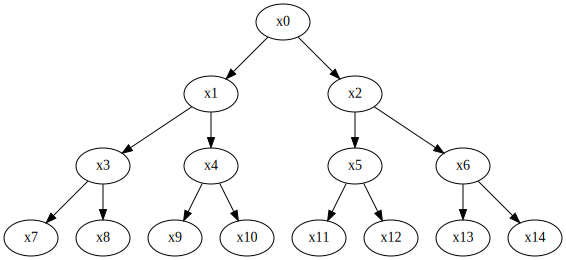

In [9]:
dotinit